In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

In [2]:
fram = pd.read_csv("fram.txt", sep = "\t")
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


In [3]:
fram.head()

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,YRS_CHD,DEATH,YRS_DTH,CAUSE
0,4988,female,57,135,186,NaN,120,150,0,1,pre,7,11,unknown
1,3001,female,60,123,165,NaN,100,167,25,0,16,10,17,unknown
2,5079,female,54,115,140,NaN,90,213,5,0,8,8,13,unknown
3,5162,female,52,102,170,NaN,104,280,15,0,10,7,11,unknown
4,4672,female,45,99,185,NaN,105,326,20,0,8,10,17,unknown


In [4]:
def rescale(s):
    return (s-s.mean())/(2*s.std())

In [5]:
# The scaled versions of all the continuous variables are added.
fram["sAGE"] = rescale(fram["AGE"])
fram["sFRW"] = rescale(fram["FRW"])
fram["sSBP"] = rescale(fram["SBP"])
fram["sSBP10"] = rescale(fram["SBP10"])
fram["sDBP"] = rescale(fram["DBP"])
fram["sCHOL"] = rescale(fram["CHOL"])
fram["sCIG"] = rescale(fram["CIG"])
fram["sCHD"] = rescale(fram["CHD"])
fram["sDEATH"] = rescale(fram["DEATH"])
fram["sYRS_DTH"] = rescale(fram["YRS_DTH"])

In [6]:
fram

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,...,sAGE,sFRW,sSBP,sSBP10,sDBP,sCHOL,sCIG,sCHD,sDEATH,sYRS_DTH
0,4988,female,57,135,186,NaN,120,150,0,1,...,0.477764,0.834668,0.676501,NaN,1.049625,-0.914016,-0.346569,-0.035923,0.827181,-0.665514
1,3001,female,60,123,165,NaN,100,167,25,0,...,0.791473,0.496687,0.301796,NaN,0.346698,-0.730446,0.732493,-0.227056,1.295472,0.099516
2,5079,female,54,115,140,NaN,90,213,5,0,...,0.164056,0.271367,-0.144281,NaN,-0.004765,-0.233727,-0.130757,-0.227056,0.983278,-0.410504
3,5162,female,52,102,170,NaN,104,280,15,0,...,-0.045083,-0.094779,0.391012,NaN,0.487283,0.489755,0.300868,-0.227056,0.827181,-0.665514
4,4672,female,45,99,185,NaN,105,326,20,0,...,-0.777070,-0.179274,0.658658,NaN,0.522430,0.986475,0.516680,-0.227056,1.295472,0.099516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,4132,male,51,100,160,NaN,98,216,30,0,...,-0.149653,-0.151109,0.212581,NaN,0.276405,-0.201332,0.948305,-0.227056,0.827181,-0.665514
1390,5418,male,50,95,174,NaN,106,192,5,0,...,-0.254223,-0.291935,0.462384,NaN,0.557576,-0.460490,-0.130757,-0.227056,0.983278,-0.410504
1391,6260,male,57,88,144,NaN,96,184,20,0,...,0.477764,-0.489090,-0.072908,NaN,0.206113,-0.546876,0.516680,-0.227056,0.202792,-1.685555
1392,5786,male,62,87,156,NaN,90,255,0,0,...,1.000612,-0.517255,0.141209,NaN,-0.004765,0.219799,-0.346569,-0.227056,0.514986,-1.175534


In [7]:
# A model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables is formed.
# Rescaled variables are used to enable comparison of relative effect between explanatory variables.
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL' , data = fram).fit()

In [8]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           4.13e-40
Time:                        15:58:05   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# The variable AGE is added to the model.
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE' , data = fram).fit()
fit.summary()
# Coefficient of Determination(R-Squared) explains the percentage of variation in the dependent variable that is explained by variation in the independent variable. Hence it shows the explanatory power of the model. However since this is a multivariate linear regression, we should use the adjusted R-squared. Because while R-squared keeps increasing with addition of more variables, adjusted R-squared penalizes for adding variables which do not improve the existing model.
# Adding age to the model does increase the explanatory power of the target variable's variance but only slightly, it increased from 0.125 to 0.146.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           2.44e-46
Time:                        15:58:05   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# All the interactions of the explanatory variables are added.
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sCHOL:sFRW + SEX:sCHOL + sAGE:sFRW + sAGE:sCHOL + sAGE:SEX', data = fram).fit()


In [11]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           4.92e-43
Time:                        15:58:05   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.001    150.355      0.000     148.580     152.508
SEX[T.male]          -4.7309      1.451     -3.261      0.001      -7.577      -1.885
sFRW                 16.6450      1.723      9.660      0.000      13.265      20.025
sFRW:SEX[T.male]      1.6673      3.088      0.540      0.589      -4.390       7.725
sCHOL                 3.6181      1.878      1.926      0.054      -0.066       7.302
SEX[T.male]:sCHOL     1.0231      2.933      0.349      0.727      -4.730       6.776
sAGE                 10.2189      2.003      5.101      0.000       6.289      14.149
sAGE:SEX[T.male]     -4.2923      2.886     -1.488      0.137      -9.953       1.368
sCHOL:sFRW            4.9729      2.718      1.829      0.068      -0.359      10.305
sAGE:sFRW            -2.0866      2.803     -0.744      0.457      -7.585       3.412
sAGE:sCHOL           -4.7564      3.044     -1.563      0.118     -10.728       1.215
==============================================================================
Omnibus:                      313.112   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.290
Skew:                           1.185   Prob(JB):                    6.10e-175
Kurtosis:                       5.863   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

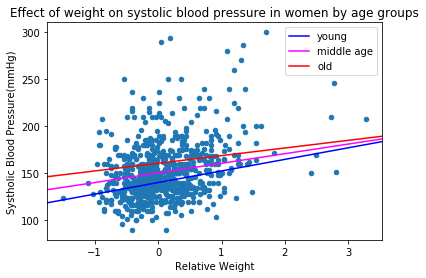

In [12]:
p=fit.params

# Creating a scatter plot with the women data, rescaled weight on the x-axis and systolic blood pressure on the y-axis.
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
plt.title("Effect of weight on systolic blood pressure in women by age groups")
plt.xlabel("Relative Weight")
plt.ylabel("Systholic Blood Pressure(mmHg)")

# Plotting the lines from youngest to oldest.
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sAGE - p["sAGE:sFRW"], ax=plt.gca(), color="blue", label="young")
abline_plot(intercept=p.Intercept, slope=p.sAGE, ax=plt.gca(), color="magenta", label="middle age")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sAGE + p["sAGE:sFRW"], ax=plt.gca(), color="red", label="old")
plt.legend()

In [13]:
# In older women, systolic blood pressure depends less on weight than it does in younger women.

In [14]:
# Rescaled cholesterol level and its interactions with other explanatory variables are added to the model.
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sCHOL:sFRW + SEX:sCHOL + sAGE:sFRW + sAGE:sCHOL + sAGE:SEX + sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE', data = fram).fit()

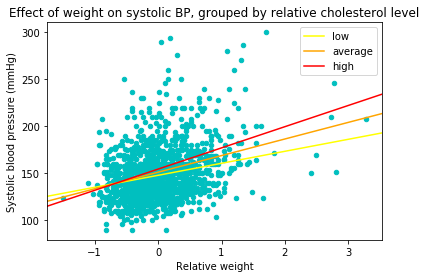

In [23]:
# Creating a scatter plot, rescaled weight on the x-axis and systolic blood pressure on the y-axis.
p=fit.params
fram.plot.scatter("sFRW", "SBP", color = 'c')
plt.title("Effect of weight on systolic BP, grouped by relative cholesterol level")
plt.xlabel("Relative weight")
plt.ylabel("Systolic blood pressure (mmHg)")

# Plotting the lines from low to high relative blood cholesterol levels. 
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sFRW:sCHOL"],ax=plt.gca(), color="yellow", label="low")
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color="orange", label="average")
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sFRW:sCHOL"],ax=plt.gca(), color="red", label="high")
plt.legend()

In [24]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           2.99e-40
Time:                        16:05:38   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.160    130.456      0.000     149.043     153.594
SEX[T.male]          -5.3834      1.598     -3.368      0.001      -8.519      -2.248
sFRW                 17.6415      1.866      9.455      0.000      13.981      21.302
SEX[T.male]:sFRW     -0.1140      3.441     -0.033      0.974      -6.865       6.637
sCHOL                 3.2957      1.965      1.677      0.094      -0.559       7.151
SEX[T.male]:sCHOL     1.4369      3.142      0.457      0.648      -4.727       7.600
sFRW:sCHOL            4.8912      2.735      1.788      0.074      -0.475      10.257
sAGE                 10.3615      2.119      4.890      0.000       6.205      14.518
sAGE:SEX[T.male]     -4.4248      3.179     -1.392      0.164     -10.661       1.811
sAGE:sFRW            -1.8501      2.848     -0.650      0.516      -7.437       3.737
sAGE:sCHOL           -4.8509      3.091     -1.569      0.117     -10.914       1.212
sCIG                  3.7733      3.106      1.215      0.225      -2.319       9.865
SEX[T.male]:sCIG     -3.9094      3.599     -1.086      0.278     -10.970       3.151
sCIG:sFRW             3.6765      3.373      1.090      0.276      -2.941      10.294
sCIG:sCHOL           -1.6344      3.368     -0.485      0.628      -8.242       4.973
sAGE:sCIG            -0.3247      3.143     -0.103      0.918      -6.490       5.840
==============================================================================
Omnibus:                      303.518   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.095
Skew:                           1.164   Prob(JB):                    1.32e-163
Kurtosis:                       5.738   Cond. No.                         7.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

In [26]:
# Defining high blood pressure as systolic BP over 140 mmHg or diastolic BP over 90 mmHg:
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
# Changing the boolean values to integer:
fram.HIGH_BP = fram.HIGH_BP.map(int)
# Creating the model:
fit = smf.glm(formula = "HIGH_BP ~ sFRW + SEX + SEX:sFRW", data = fram, family = sm.families.Binomial()).fit()
# Calculating the error rate:
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP)|((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(f"Error rate: {round(error_rate_orig, 3)*100}%")

Error rate: 35.6%


In [27]:
# Creating a new model with rescaled age and its interactions with other explanatory variables added: 
fit = smf.glm(formula = "HIGH_BP ~ sFRW + SEX + SEX:sFRW +sAGE + sAGE:sFRW + sAGE:SEX", data = fram, family = sm.families.Binomial()).fit()
# Calculating the error rate:
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP)|((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate)
# The error rate of this model is slightly less than the previous model.

0.3278335724533716


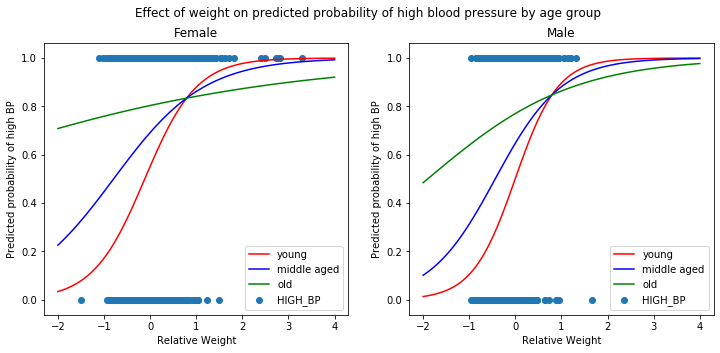

In [44]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

fig, ax = plt.subplots(1,2, subplot_kw={"xlabel": "Relative Weight", "ylabel": "Systolic Blood Pressure (mmHg)"}, sharey= False, figsize=(12, 5))
fig.suptitle("Effect of weight on predicted probability of high blood pressure by age group")


X=np.linspace(-2, 4, 100)
p = fit.params

ax[0].scatter(fram.sFRW[fram.SEX=="female"], fram.HIGH_BP[fram.SEX =='female'], label = "HIGH_BP")
ax[1].scatter(fram.sFRW[fram.SEX=="male"], fram.HIGH_BP[fram.SEX =='male'], label = "HIGH_BP")

ax[0].set_title('Female')
ax[1].set_title("Male")



ax[0].plot(X, logistic(X * (p.sFRW - p["sAGE:sFRW"]) + p.Intercept - p.sAGE), color = "red", label = "young")
ax[0].plot(X, logistic(X * p.sFRW + p.Intercept), color = "blue", label = "middle aged")
ax[0].plot(X, logistic(X * (p.sFRW + p["sAGE:sFRW"]) + p.Intercept + p.sAGE), color = "green", label = "old")

ax[0].set_title("Female")
ax[0].set_xlabel("Relative Weight")
ax[0].set_ylabel("Predicted probability of high BP")
ax[0].legend()

ax[1].plot(X, logistic(X * (p.sFRW + p["SEX[T.male]:sFRW"] - p["sAGE:sFRW"]) + p["SEX[T.male]"] + p.Intercept - p["sAGE"]), color = "red", label = "young")
ax[1].plot(X, logistic(X * (p.sFRW + p["SEX[T.male]:sFRW"]) + p["SEX[T.male]"] + p.Intercept), color = "blue", label = "middle aged")
ax[1].plot(X, logistic(X * (p.sFRW + p["SEX[T.male]:sFRW"] + p["sAGE:sFRW"]) + p["SEX[T.male]"] + p.Intercept + p["sAGE"]), color = "green", label = "old")

ax[1].set_title("Male")
ax[1].set_xlabel("Relative Weight")
ax[1].set_ylabel("Predicted probability of high BP")
ax[1].legend()

In [45]:
def train_test_split(df, train_fraction = 0.8):
    #taking the training sample with sample function
    train=df.sample(frac=train_fraction)
    #taking the rest (=testing sample) from the original dataframe by picking the IDs that are not in the training frame:
    test=df.drop(train.index)
    return train, test

In [46]:
np.random.seed(1)
error_model =[]
error_null = []


for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm('HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sFRW:sAGE + SEX:sAGE', data = train, family = sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()
    pred = fit.predict(test, transform = True)

    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP ==1)) | ((pred > 0.5) & (test.HIGH_BP == 0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())
pd.Series(error_model).mean()

C:\Users\Melis\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


0.3311827956989248

In [47]:
statsmodels.stats.stattools.stats.mannwhitneyu(error_model, error_null, alternative="two-sided")

MannwhitneyuResult(statistic=3020.0, pvalue=1.2819846293843994e-06)

In [48]:
np.mean(error_model)

0.3311827956989247

In [49]:
np.mean(error_null)

0.3488530465949821

In [50]:
fram["hasCHD"] = fram["CHD"] > 0
fram["hasCHD"] = fram["hasCHD"].astype('int')

In [51]:
fram.head()

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,...,sSBP,sSBP10,sDBP,sCHOL,sCIG,sCHD,sDEATH,sYRS_DTH,HIGH_BP,hasCHD
0,4988,female,57,135,186,NaN,120,150,0,1,...,0.676501,NaN,1.049625,-0.914016,-0.346569,-0.035923,0.827181,-0.665514,1,1
1,3001,female,60,123,165,NaN,100,167,25,0,...,0.301796,NaN,0.346698,-0.730446,0.732493,-0.227056,1.295472,0.099516,1,0
2,5079,female,54,115,140,NaN,90,213,5,0,...,-0.144281,NaN,-0.004765,-0.233727,-0.130757,-0.227056,0.983278,-0.410504,1,0
3,5162,female,52,102,170,NaN,104,280,15,0,...,0.391012,NaN,0.487283,0.489755,0.300868,-0.227056,0.827181,-0.665514,1,0
4,4672,female,45,99,185,NaN,105,326,20,0,...,0.658658,NaN,0.522430,0.986475,0.516680,-0.227056,1.295472,0.099516,1,0


In [52]:
# Creating the model with rescaled cholesterol level, number of cigarettes, and weight as explanatory variables, and the probability of having coronary heart disease as independent variable.
fit = smf.glm(formula = "hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCHOL:sFRW + sCIG:sFRW", data = fram, family = sm.families.Binomial()).fit()

In [53]:
error_rate = np.mean(((fit.fittedvalues < 0.5) & (fram.hasCHD) | ((fit.fittedvalues > 0.5) & (~fram.hasCHD))))
print(f"Error rate: {round(error_rate, 3)*100}%")

Error rate: 22.0%


In [54]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Wed, 13 Jan 2021   Deviance:                       1442.4
Time:                        17:08:00   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.000      -1.421      -1.157
sCHOL          0.3324      0.130      2.554      0.011       0.077       0.587
sCIG           0.4613      0.126      3.666      0.000       0.215       0.708
sFRW           0.4404      0.130      3.386      0.001       0.185       0.695
sCHOL:sCIG    -0.1022      0.273     -0.374      0.708      -0.637       0.433
sCHOL:sFRW     0.1359      0.239      0.568      0.570      -0.333       0.604
sCIG:sFRW      0.1646      0.258      0.637      0.524      -0.342       0.671
==============================================================================
"""

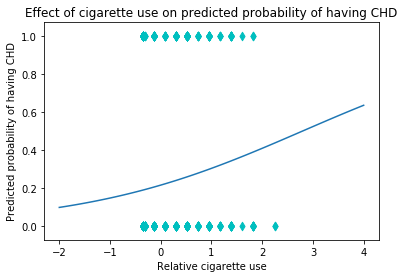

In [58]:
X=np.linspace(-2, 4, 100)
p = fit.params
plt.scatter(fram.sCIG, fram.hasCHD, marker = 'd', color = 'c')
plt.xlabel("Relative cigarette use")
plt.ylabel("Predicted probability of having CHD")
plt.title("Effect of cigarette use on predicted probability of having CHD")
plt.plot(X, logistic(X *p.sCIG + p.Intercept))

In [63]:
# If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal heart disease?

In [64]:
cholestherol = (200-fram.CHOL.mean())/(fram.CHOL.std()*2)
cigarettes = (17-fram.CIG.mean())/(fram.CIG.std()*2)
weight = (100-fram.FRW.mean())/(fram.FRW.std()*2)
point = {"sCHOL" : cholestherol, "sCIG":cigarettes, "sFRW": weight}
predicted1 = fit.predict(point)
predicted = predicted1[0]
print(f"Predicted probability of having coronal heart disease for a person with these risk factors is {round(predicted, 2)*100}%")

Predicted probability of having coronal heart disease for a person with these risk factors is 22.0%
